### 1. Importación Librerías

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### 2. Carga de Datos

In [2]:
# Se cargan los datos. 
datos=pd.read_csv('202210_Laboratorio1_data_Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8', index_col=0, low_memory=False)

In [3]:
# Cantidad de datos y número de variables
datos.shape

(100000, 26)

In [4]:
#Visualizacion de los datos
datos.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
Diabetes_012,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,40,1,0,0,0,0,1,0,1,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
0,0,0,0,25,1,0,0,1,0,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
0,1,1,1,28,0,0,0,0,1,0,0,1,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
0,1,0,1,27,0,0,0,1,1,1,0,1,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
0,1,1,1,24,0,0,0,1,1,1,0,1,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


### 3. Limpieza y Preparación de Datos

In [5]:
# Podemos ver los tipos de todas la variables.
datos.dtypes

HighBP                   object
HighChol                 object
CholCheck                object
BMI                      object
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                 object
PhysHlth                 object
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
Unnamed: 26             float64
dtype: object

In [6]:
# Eliminar las columnas en nulo
datos = datos.drop(['Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26' ], axis=1)

In [7]:
#Ya que solo hay dos tipo int vamos a transformar los demás
datos.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99982,99991,99984,99981,99979,99987,99987,99985,99976,99989,99988,99984,99978,99982,99986,99978,99987,99991,99988,99981,99999
unique,5,5,5,95,5,5,5,5,5,5,5,5,5,8,49,54,5,5,16,9,11
top,0,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8
freq,56544,56814,96330,9624,55426,95818,90617,76135,63639,81464,94248,95003,91757,35060,68495,62518,83320,56163,13114,43815,36920


In [8]:
#Encontrar valores nulos en las columnas
datos.isnull().sum()

HighBP                  18
HighChol                 9
CholCheck               16
BMI                     19
Smoker                  21
Stroke                  13
HeartDiseaseorAttack    13
PhysActivity            15
Fruits                  24
Veggies                 11
HvyAlcoholConsump       12
AnyHealthcare           16
NoDocbcCost             22
GenHlth                 18
MentHlth                14
PhysHlth                22
DiffWalk                13
Sex                      9
Age                     12
Education               19
Income                   1
dtype: int64

In [9]:
#Creamos variable copia de datos para transformarla
datos_n = datos

In [10]:
#Visualizacion de copia
datos_n

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,1,1,19,1,0,0,1,0,0,0,1,0,3,0,4,0,0,11,5,5
0,1,1,1,25,1,0,1,1,1,1,0,1,0,2,0,10,1,0,13,4,5
0,0,1,1,29,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,8


In [11]:
colNames = datos_n.columns
for i in colNames:
    print (datos_n[i].describe())
    print ("_______________________________________")

count     99982
unique        5
top           0
freq      56544
Name: HighBP, dtype: object
_______________________________________
count     99991
unique        5
top           0
freq      56814
Name: HighChol, dtype: object
_______________________________________
count     99984
unique        5
top           1
freq      96330
Name: CholCheck, dtype: object
_______________________________________
count     99981
unique       95
top          27
freq       9624
Name: BMI, dtype: object
_______________________________________
count     99979
unique        5
top           0
freq      55426
Name: Smoker, dtype: object
_______________________________________
count     99987
unique        5
top           0
freq      95818
Name: Stroke, dtype: object
_______________________________________
count     99987
unique        5
top           0
freq      90617
Name: HeartDiseaseorAttack, dtype: object
_______________________________________
count     99985
unique        5
top           1
freq      76

In [12]:
for i in colNames:
    print (datos_n[i].value_counts())
    print ("_______________________________________")

0     56544
1     43394
-        19
Xx       18
?         7
Name: HighBP, dtype: int64
_______________________________________
0     56814
1     43152
Xx       10
-         8
?         7
Name: HighChol, dtype: int64
_______________________________________
1     96330
0      3624
-        15
Xx       10
?         5
Name: CholCheck, dtype: int64
_______________________________________
27    9624
26    7938
24    7768
25    6712
28    6459
      ... 
88       1
85       1
91       1
86       1
83       1
Name: BMI, Length: 95, dtype: int64
_______________________________________
0     55426
1     44507
Xx       20
-        15
?        11
Name: Smoker, dtype: int64
_______________________________________
0     95818
1      4137
Xx       16
-        13
?         3
Name: Stroke, dtype: int64
_______________________________________
0     90617
1      9337
-        16
Xx       10
?         7
Name: HeartDiseaseorAttack, dtype: int64
_______________________________________
1     76135
0     2381

In [13]:
for i in colNames:
    datos_n[i].replace({"-": -1, "Xx": -1, "?": -1}, inplace=True)

In [58]:
df=datos_n["MentHlth"]
df.to_numpy()

array(['18', '0', '30', ..., '0', '0', '0'], dtype=object)

In [60]:
for i in df:
    if i < -1:
        df.replace({i: -1}, inplace=True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [33]:
print (df.value_counts())

0      68495
2       5145
30      4579
5       3683
1       3466
3       3050
10      2494
15      2149
4       1524
20      1356
7       1249
25       499
14       448
6        399
8        236
12       167
28       162
21        92
16        66
29        64
18        56
22        47
9         40
-1        38
24        37
26        34
36        28
-21       26
-33       25
-29       25
-27       25
27        25
34        24
-25       24
-19       23
32        23
-35       21
-31       20
13        20
11        18
23        16
-17       15
17        15
-23       15
-15       14
19         9
Name: MentHlth, dtype: int64


In [14]:
for i in colvalues:
    print (datos_n[i].value_counts())
    print ("_______________________________________")

0     56544
1     43394
-1       44
Name: HighBP, dtype: int64
_______________________________________
0     56814
1     43152
-1       25
Name: HighChol, dtype: int64
_______________________________________
1     96330
0      3624
-1       30
Name: CholCheck, dtype: int64
_______________________________________
27    9624
26    7938
24    7768
25    6712
28    6459
      ... 
86       1
96       1
88       1
85       1
83       1
Name: BMI, Length: 93, dtype: int64
_______________________________________
0     55426
1     44507
-1       46
Name: Smoker, dtype: int64
_______________________________________
0     95818
1      4137
-1       32
Name: Stroke, dtype: int64
_______________________________________
0     90617
1      9337
-1       33
Name: HeartDiseaseorAttack, dtype: int64
_______________________________________
1     76135
0     23817
-1       33
Name: PhysActivity, dtype: int64
_______________________________________
1     63639
0     36304
-1       33
Name: Fruits, dtype: 

In [51]:
#Tipos de datos que se tienen
datos.dtypes

HighBP                  object
HighChol                object
CholCheck               object
BMI                     object
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                object
PhysHlth                object
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
dtype: object

In [61]:
#Cambiamos el tipo de datos a numerico para poder evaluar los valores mas adelante
datos_n = datos_n.astype(float)
datos_n.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [62]:
#Confirmamos que sean numericos y ahora vemos las estadisticas de los datos.
datos_n.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99982.000000,99991.000000,99984.000000,99981.000000,99979.000000,99987.000000,99987.000000,99985.000000,99976.000000,99989.00000,99988.000000,99984.000000,99978.000000,99982.000000,99986.000000,99978.000000,99987.000000,99991.000000,99988.000000,99981.000000,99999.000000
mean,0.433578,0.431309,0.963154,28.306628,0.444703,0.041055,0.093052,0.761134,0.636213,0.81433,0.056927,0.949902,0.081588,2.502650,3.149321,4.198214,0.165992,0.437539,8.087621,5.074574,6.103461
std,0.496458,0.495766,0.189970,7.703294,0.497860,0.200026,0.291641,0.427166,0.481776,0.38987,0.232738,0.219428,0.274904,1.070946,7.552312,8.932650,0.373015,0.496871,3.048111,0.991986,2.062213
min,-1.000000,-1.000000,-1.000000,-35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-35.000000,-43.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,36.000000,42.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
#Pasamos la columna 'Outcome' a tipo 'Category'
datos_n.Outcome = datos_n.Outcome.astype('category')

In [63]:
#Visualizamos los tipos de datos finales
datos_n.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [64]:
#Vemos que se debe depurar la edad de valores sin sentido (ejm: 3,256 años)
datos_n.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99982.000000,99991.000000,99984.000000,99981.000000,99979.000000,99987.000000,99987.000000,99985.000000,99976.000000,99989.00000,99988.000000,99984.000000,99978.000000,99982.000000,99986.000000,99978.000000,99987.000000,99991.000000,99988.000000,99981.000000,99999.000000
mean,0.433578,0.431309,0.963154,28.306628,0.444703,0.041055,0.093052,0.761134,0.636213,0.81433,0.056927,0.949902,0.081588,2.502650,3.149321,4.198214,0.165992,0.437539,8.087621,5.074574,6.103461
std,0.496458,0.495766,0.189970,7.703294,0.497860,0.200026,0.291641,0.427166,0.481776,0.38987,0.232738,0.219428,0.274904,1.070946,7.552312,8.932650,0.373015,0.496871,3.048111,0.991986,2.062213
min,-1.000000,-1.000000,-1.000000,-35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-35.000000,-43.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,36.000000,42.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [66]:
#Vemos que hay solo dos valores por encima de 110 en edad
datos_n.loc[datos_n['MentHlth'] >= 30]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
2,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
0,0.0,1.0,1.0,33.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,28.0,0.0,0.0,4.0,6.0,2.0
0,1.0,1.0,1.0,22.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
0,0.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,30.0,0.0,0.0,0.0,8.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,30.0,0.0,0.0,0.0,1.0,5.0,3.0
0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,30.0,2.0,0.0,0.0,11.0,4.0,1.0
2,1.0,1.0,1.0,31.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,1.0,10.0,5.0,7.0


In [68]:
#Limitamos las edades a 110 años
datos_n = datos_n[datos_n.MentHlth <= -1]

In [69]:
#Verificamos que los valore extremos se hayan eliminado
datos_n.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.428044,0.457565,0.940959,28.236162,0.420664,0.044280,0.095941,0.785978,0.664207,0.826568,0.051661,0.937269,0.062731,2.546125,-22.180812,4.092251,0.177122,0.413284,8.107011,5.062731,5.763838
std,0.503127,0.499118,0.236137,6.423592,0.494579,0.206098,0.295055,0.410901,0.480905,0.379321,0.221750,0.257722,0.242926,1.070087,10.241191,8.574444,0.382478,0.493334,3.007335,1.007258,2.189948
min,-1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,-35.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-29.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-25.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,-19.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,-1.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [70]:
#Se busca eliminar/reemplazar valores de 0 en Glucose, BP, Insulin, BMI, ST
#Se ven cuales registros tienen BP en 0
datos_n.loc[datos_n['BloodPressure'] == 0]

KeyError: 'BloodPressure'

In [72]:
#Se sacan los datos sin ceros de BP para visualizar
basePromBP = datos_n.loc[datos_n['BloodPressure'] != 0]
basePromBP.describe()

KeyError: 'BloodPressure'

In [73]:
#Se ven cuales registros tienen Insulina en 0 retirando los BP en 0
basePromBP.loc[basePromBP['Insulin'] == 0]

NameError: name 'basePromBP' is not defined

In [74]:
#Eliminamos las filas con Insulin en 0 ya que utilizar un método de imputación a casi la mitad de los datos totales puede sesgar el modelo.
datos_n = datos_n[datos_n.Insulin != 0]
datos_n.describe()

AttributeError: 'DataFrame' object has no attribute 'Insulin'

In [75]:
#Numero de datos y columnas
datos_n.shape

(271, 21)

In [76]:
#Vemos que retirando los Insulin en 0, se retiran la mayoria de 0 en el resto de variables
datos_n[(datos_n == 0)].count()

HighBP                  153
HighChol                147
CholCheck                16
BMI                       0
Smoker                  157
Stroke                  259
HeartDiseaseorAttack    245
PhysActivity             58
Fruits                   89
Veggies                  47
HvyAlcoholConsump       257
AnyHealthcare            15
NoDocbcCost             254
GenHlth                   0
MentHlth                  0
PhysHlth                177
DiffWalk                223
Sex                     159
Age                       0
Education                 0
Income                    0
dtype: int64

In [77]:
#Visualizacion de datos sin valores en 0 para Glucose
basePromG = datos_n.loc[datos_n['Glucose'] != 0]
basePromG.describe()

KeyError: 'Glucose'

In [79]:
#Se saca la media de Glucose sin los ceros en la variable mG
mG = basePromG['Glucose'].mean()
print(mG)

NameError: name 'basePromG' is not defined

In [32]:
datos_n['Glucose'].replace({0 : mG}, inplace=True)
datos_n.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.292621,122.683673,70.671756,29.111959,155.722646,307.094148,483.870229,30.839695
std,3.211645,30.792872,12.481277,10.517123,118.876724,106.867521,345.723260,10.199903
min,0.000000,56.000000,24.000000,7.000000,14.000000,0.000000,4.000000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,262.000000,246.000000,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,327.000000,422.000000,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,368.000000,673.000000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,671.000000,2329.000000,81.000000


In [80]:
datos_n.loc[datos_n['BMI'] == 0]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,


In [81]:
#Visualizacion de datos sin valores en 0 para BMI
mBMI = datos_n.loc[datos_n['BMI'] != 0]['BMI'].mean()
print(mBMI)

28.236162361623617


In [82]:
#cambiar valor de 0 de BMI por la media del resto
datos_n['BMI'].replace({0 : mBMI}, inplace=True)
datos_n.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.428044,0.457565,0.940959,28.236162,0.420664,0.044280,0.095941,0.785978,0.664207,0.826568,0.051661,0.937269,0.062731,2.546125,-22.180812,4.092251,0.177122,0.413284,8.107011,5.062731,5.763838
std,0.503127,0.499118,0.236137,6.423592,0.494579,0.206098,0.295055,0.410901,0.480905,0.379321,0.221750,0.257722,0.242926,1.070087,10.241191,8.574444,0.382478,0.493334,3.007335,1.007258,2.189948
min,-1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,-35.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-29.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-25.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,-19.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,-1.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [83]:
#Ya ninguno de los datos que no debería estar en cero está en cero
datos_n[(datos_n == 0)].count()

HighBP                  153
HighChol                147
CholCheck                16
BMI                       0
Smoker                  157
Stroke                  259
HeartDiseaseorAttack    245
PhysActivity             58
Fruits                   89
Veggies                  47
HvyAlcoholConsump       257
AnyHealthcare            15
NoDocbcCost             254
GenHlth                   0
MentHlth                  0
PhysHlth                177
DiffWalk                223
Sex                     159
Age                       0
Education                 0
Income                    0
dtype: int64

In [85]:
datos_f = datos_n
datos_f = datos_f.reset_index()

In [86]:
#Pasamos la columna 'Hair color' a tipo 'Category'
datos_f['Hair color'] = datos_f['Hair color'] .astype('category')
datos_f.dtypes

KeyError: 'Hair color'

In [39]:
#Vemos la cantidad de 1s y 0s en el Outcome, siendo mucho mayor la cantidad de 0s.
datos_f.Outcome.value_counts()

0.0    263
1.0    130
Name: Outcome, dtype: int64

In [40]:
#Pasamos la columna 'Hair color' de categorica a int para poder entrenar el modelo
datos_f['HairColor'] = datos_f['Hair color'].cat.codes
datos_f = datos_f.drop(['Hair color'],axis=1)

### 4. Construcción del modelo con Random Forest

In [41]:
#Se selecciona la variable objetivo 'Outcome'
Y = datos_f['Outcome']
#Del conjunto de datos se elimina la variable 'Outcome'
X = datos_f.drop(['Outcome'],axis=1)

In [42]:
#Se dividen los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Text(0, 0.5, 'Testing Accuracy')

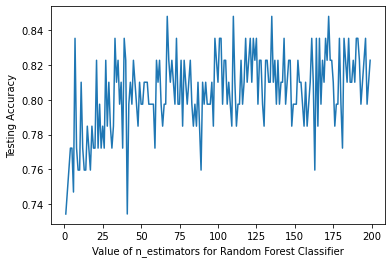

In [43]:
#Graficamos la relación entre Accuracy y n_estimators para conocer que rango buscar en el GridSearchCV
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [44]:
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

In [45]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [100]:
#De acuerdo al pico de la gráfica buscamos entre ciertos valores de n_estimators
param_grid3 = { 
    'n_estimators': range(90,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
#Usamos GrisSearchCV para buscar los mejores hiperparámetros
mejor3 = GridSearchCV(estimator=rfc, param_grid=param_grid3, cv= particiones)
mejor3.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=199),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(90, 100)})

In [102]:
#Vemos cual fué la mejor combinación de hiperparámetros según la búsqueda
mejor3.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 98}

In [103]:
# Obtener el mejor modelo.
arbol_final3 = mejor3.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train3 = arbol_final3.predict(X_train)
y_pred_test3 = arbol_final3.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % metrics.accuracy_score(Y_train, y_pred_train3))
print('Exactitud sobre test: %.2f' % metrics.accuracy_score(Y_test, y_pred_test3))

Exactitud sobre entrenamiento: 0.91
Exactitud sobre test: 0.78


In [104]:
#Sacamos el reporte de clasificación de train
print(metrics.classification_report(Y_train, y_pred_train3))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       213
         1.0       0.88      0.83      0.85       101

    accuracy                           0.91       314
   macro avg       0.90      0.89      0.89       314
weighted avg       0.91      0.91      0.91       314



In [105]:
#Sacamos el reporte de clasificación de test
print(metrics.classification_report(Y_test, y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        50
         1.0       0.75      0.62      0.68        29

    accuracy                           0.78        79
   macro avg       0.78      0.75      0.76        79
weighted avg       0.78      0.78      0.78        79



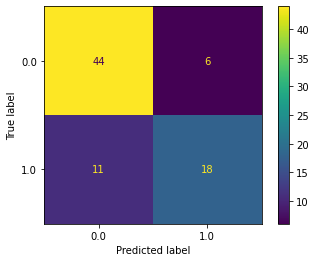

In [106]:
# Se puede visualizar la matriz de confusión donde el modelo tiene una alta probabilidad de predecir 0 en el Outcome.
metrics.plot_confusion_matrix(arbol_final3, X_test, Y_test)  
plt.show()

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
#Se utiliza SMOTE para balancear los datos
sm = SMOTE(random_state = 2)
X_train_bal, Y_train_bal = sm.fit_resample(X_train, Y_train.ravel())

In [109]:
X_train_bal.shape

(426, 9)

In [110]:
X_train.shape

(314, 9)

Text(0, 0.5, 'Testing Accuracy')

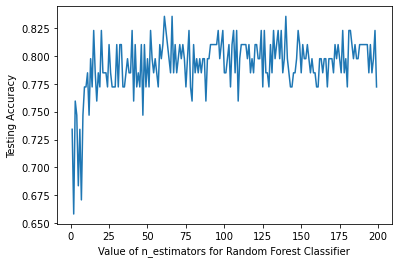

In [111]:
#Graficamos la relación entre Accuracy y n_estimators para conocer que rango buscar en el GridSearchCV
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train_bal, Y_train_bal)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [112]:
#De acuerdo al pico de la gráfica buscamos entre ciertos valores de n_estimators
param_grid_bal = { 
    'n_estimators': range(15,20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
#Usamos GrisSearchCV para buscar los mejores hiperparámetros
mejor_bal = GridSearchCV(estimator=rfc, param_grid=param_grid_bal, cv= particiones)
mejor_bal.fit(X_train_bal, Y_train_bal)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=199),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(15, 20)})

In [113]:
#Vemos cual fué la mejor combinación de hiperparámetros según la búsqueda
mejor_bal.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 16}

In [114]:
# Obtener el mejor modelo.
arbol_final_bal = mejor_bal.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train_bal = arbol_final_bal.predict(X_train_bal)
y_pred_test_bal = arbol_final_bal.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % metrics.accuracy_score(Y_train_bal, y_pred_train_bal))
print('Exactitud sobre test: %.2f' % metrics.accuracy_score(Y_test, y_pred_test_bal))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.77


In [71]:
#Sacamos el reporte de clasificación de test
print(metrics.classification_report(Y_test, y_pred_test_bal))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        50
         1.0       0.71      0.76      0.73        29

    accuracy                           0.80        79
   macro avg       0.78      0.79      0.79        79
weighted avg       0.80      0.80      0.80        79



In [72]:
#Sacamos el reporte de clasificación de train
print(metrics.classification_report(Y_train_bal, y_pred_train_bal))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       213
         1.0       0.96      1.00      0.98       213

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



### 5. Predicciones y Probabilidad

In [ ]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
predic = arbol_final3.predict_proba(X_test.iloc[[30]])

In [ ]:
print(predic)

[[1. 0.]]


In [ ]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
arbol_final3.classes_

array([0., 1.])

### 6. Interpretación del Modelo

In [ ]:
importancia = arbol_final3.feature_importances_
importancia

array([0.07929099, 0.21802719, 0.07310091, 0.07282105, 0.20722383,
       0.08011417, 0.09734276, 0.16905816, 0.00302093])

In [ ]:
#Encontramos los valores de importancia que se le dieron a las variables del modelo
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.218027
1,Insulin,0.207224
2,Age,0.169058
3,DiabetesPedigreeFunction,0.097343
4,BMI,0.080114
5,Pregnancies,0.079291
6,BloodPressure,0.073101
7,SkinThickness,0.072821
8,HairColor,0.003021


Gracias a los resultados de la importancia de cada variable frente al modelo, podemos decir que la menos relevante es el color de pelo, y que las trés mas relevantes son Glucosa, Insulina y Edad (en ese orden). Viendo que la insulina es una de las mas importantes, buscamos otra manera de reemplazar los valores faltantes (en ceros) que son bastantes. Implementamos el modelo con KNNImputer, pero esto, aunque si ayuda en mantener una cantidad de muestras mas importante, no mejora la capacidad de clasificación del modelo.